<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Pima%EB%B9%A0%EB%A5%B4%EA%B2%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Pima Indians.csv')

In [4]:
data.shape

(768, 9)

In [15]:
data.loc[:,'Glucose':'Age'] = data.loc[:,'Glucose':'Age'].replace(0,np.NaN)

In [18]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

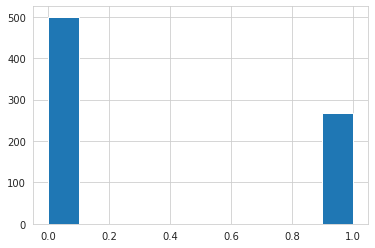

In [19]:
data.Outcome.hist()

In [20]:
from sklearn.utils import resample

In [21]:
no = data[data.Outcome != 1]
yes = data[data.Outcome == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=100)
data = pd.concat([no, yes_oversampled], axis=0)

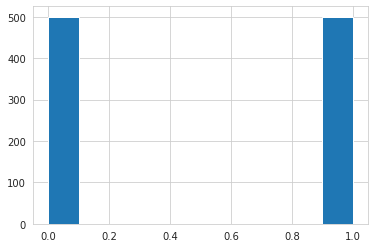

In [22]:
data.Outcome.hist()
## 오버샘플링

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
miceimputed = data.copy(deep=True)
imputed = IterativeImputer()
miceimputed.iloc[:,:] = imputed.fit_transform(data)
## 결측치 해결

In [28]:
data = miceimputed
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000000
Glucose                      45.000000
BloodPressure                14.000000
SkinThickness                12.173717
Insulin                     102.422825
BMI                           8.850000
DiabetesPedigreeFunction      0.412250
Age                          16.250000
Outcome                       1.000000
dtype: float64


In [32]:
data_copy = data.copy()
## data는 이상치 제거 하고, data_copy는 바로 모델링 해본다.

In [33]:
from sklearn.preprocessing import robust_scale

In [42]:
X = data_copy.drop(['Outcome'], axis=1)
Y = data_copy['Outcome']

In [55]:
scaler = robust_scale(X)
X = scaler

In [43]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.25, random_state=100)
print(f'{X_train.shape, Y_train.shape, X_test.shape, Y_test.shape}')

((750, 8), (750,), (250, 8), (250,))


In [47]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, cohen_kappa_score, classification_report

In [70]:
model_rf = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_rf)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_rf)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_rf)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_rf)}')

accuracy : 0.828
f1_score : 0.8185654008438819
roc_auc_score : 0.8298503611971104
cohen_kappa_score : 0.6555149650708197


In [58]:
model_xgb = xgb.XGBClassifier(max_depth=100, n_estimators=200, n_jobs=-1)
model_xgb.fit(X_train, Y_train)
Y_pred_xgb = model_xgb.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_xgb)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_xgb)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_xgb)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_xgb)}')

accuracy : 0.804
f1_score : 0.7966804979253113
roc_auc_score : 0.8070820433436533
cohen_kappa_score : 0.6085511599667668


In [50]:
from sklearn.model_selection import GridSearchCV, 

In [59]:
param_rf = {'max_depth':np.arange(100, 200, 10), 'n_estimators':np.arange(50, 200, 10)}
grid_rf = GridSearchCV(model_rf, param_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=100,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=False,
                                              random_s

In [63]:
print(f'RainForest의 best socre : {grid_rf.best_score_}, best parameter : {grid_rf.best_params_}')

RainForest의 best socre : 0.8720000000000001, best parameter : {'max_depth': 130, 'n_estimators': 80}


In [68]:
model_rf = RandomForestClassifier(max_depth=130, n_estimators=80)
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)
print(f'accuracy : {accuracy_score(Y_test, Y_pred_rf)}')
print(f'f1_score : {f1_score(Y_test, Y_pred_rf)}')
print(f'roc_auc_score : {roc_auc_score(Y_test, Y_pred_rf)}')
print(f'cohen_kappa_score : {cohen_kappa_score(Y_test, Y_pred_rf)}')
## 더 안좋은데...

accuracy : 0.808
f1_score : 0.7948717948717949
roc_auc_score : 0.8086300309597524
cohen_kappa_score : 0.6146435452793835


In [37]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.000000,29.000000,75.723622,26.6,0.351,31.0,0.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.1,0.167,21.0,0.0
5,5.0,116.0,74.000000,22.563186,113.528138,25.6,0.201,30.0,0.0
7,10.0,115.0,74.047444,31.774664,129.515705,35.3,0.134,29.0,0.0
10,4.0,110.0,92.000000,32.988489,108.720364,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...,...,...
740,11.0,120.0,80.000000,37.000000,150.000000,42.3,0.785,48.0,1.0
603,7.0,150.0,78.000000,29.000000,126.000000,35.2,0.692,54.0,1.0
291,0.0,107.0,62.000000,30.000000,74.000000,36.6,0.757,25.0,1.0
22,7.0,196.0,90.000000,37.222533,290.493538,39.8,0.451,41.0,1.0
